# Between Subject Counterbalanced Discrimination Sequences 

- use all 192 images from the verbal judgement sequences
- randomly pick discriminations 
- try to ensure that the depth differences are evenly distributed 

In [1]:
import json 
import numpy as np 
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
import copy
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [3]:
# p0 = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_MTurk/jsons/a.json'
p0 = '/Users/prachi/Documents/depth_duration/SUN-RGBD_stimuli_prep/V2_sequences/a.json'

with open(p0) as f:
    seq_a = json.load(f)

In [5]:
VE_seq = []

for trial in seq_a:
    if trial['sequence'] != 'catch_trial':
        img = trial['image_path']
        depth = trial['depth']

        VE_seq.append([img, depth])

VE_seq_arr = np.array(VE_seq)

In [902]:
# indeces to VE trials 
indeces = np.arange(0,192)
# randomly shuffle the order so that discrimination trials can be made 
random.shuffle(indeces)

# make groups of two (discrimination trials)
picks = [indeces[i:i + 2] for i in range(0, len(indeces), 2)] 

# # list of discrimination trials based on random picks
# discriminations = []

# for combo in picks:
#     img0 = VE_seq_arr[combo[0]]
#     img1 = VE_seq_arr[combo[1]]
#     discriminations.append([img0, img1])
    
# # look at distribution of depth differences in the random sequence

# differences = []

# for trial in discriminations:
#     depth0 = float(trial[0][1])
#     depth1 = float(trial[1][1])
    
#     diff = abs(depth0-depth1)
#     differences.append(diff)

    
    
# plt.figure()


# plt.hist(differences)
# plt.title('Distribution of Depth Differences')


# print(np.array(differences).mean(),np.array(differences).std())
# print(chisquare(differences, uniform))

# plt.show()



0.9900910785370314
96


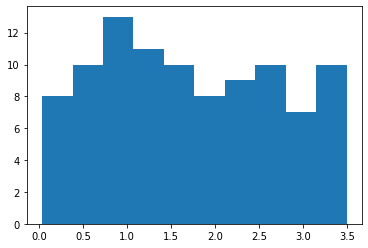

In [245]:
# std of uniform distribution 

std_uniform = (3.5-0)/(np.sqrt(12))

# uniform distribution 
uniform = np.random.uniform(low = 0.0, high = 3.6, size = len(differences))  
plt.hist(uniform)
print(np.array(uniform).std())
print(len(uniform))
plt.show();

In [79]:
option1 = copy.deepcopy(discriminations)
option1_differences = copy.deepcopy(differences)

0.8163254772604568
Power_divergenceResult(statistic=116.44984909747168, pvalue=0.06681857460689793)


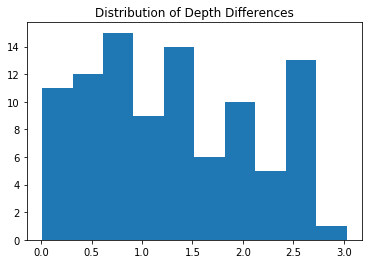

In [249]:
plt.figure()

plt.hist(option1_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option1_differences).std())
print(chisquare(option1_differences, uniform))
plt.show()


In [88]:
option2 = copy.deepcopy(discriminations)
option2_differences = copy.deepcopy(differences)

0.7297319898324904


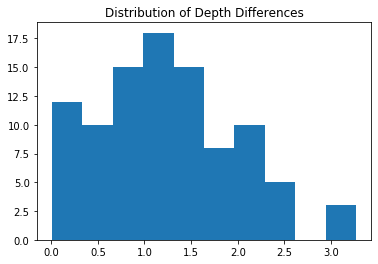

In [202]:
plt.figure()

plt.hist(option2_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option2_differences).std())

plt.show()

In [171]:
option3 = copy.deepcopy(discriminations)
option3_differences = copy.deepcopy(differences)

0.7715105008995148


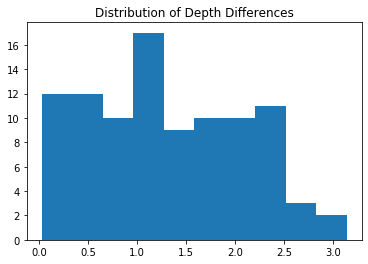

In [203]:
plt.figure()

plt.hist(option3_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option3_differences).std())


plt.show()

In [589]:
option4 = copy.deepcopy(discriminations)
option4_differences = copy.deepcopy(differences)

0.7495098733841441


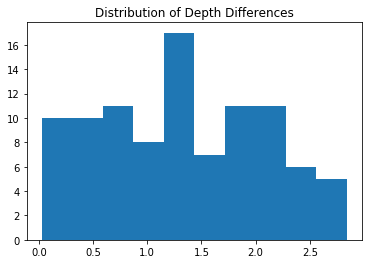

In [590]:
plt.figure()

plt.hist(option4_differences)
plt.title('Distribution of Depth Differences')

print(np.array(option4_differences).std())


plt.show()

# Constrain to Depth Differences =< 1 meter

In [6]:
VE_seq_arr[0]

# (1) first sort by depth? 

array(['depth_duration_stimuli/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4-original.jpg',
       '2.354'], dtype='<U155')

In [7]:

# Python code to sort the tuples using second element 
# of sublist Function to sort using sorted()
def Sort(sub_li):
  
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of 
    # sublist lambda has been used
    return(sorted(sub_li, key = lambda x: x[1]))    
  
# Driver Code
sorted_VE_seq = Sort(VE_seq)

In [8]:
sorted_VE_seq[0]

['depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-original.jpg',
 1.138]

In [39]:
# indeces to VE trials 
indeces = np.arange(0,192)
indeces = list(indeces)
final_picks = []

sampled_indeces = []
while len(final_picks) < 96:
    rand_pick = random.sample(set(indeces), 2)
    d1 = sorted_VE_seq[rand_pick[0]][1]
    d2 = sorted_VE_seq[rand_pick[1]][1]
    diff = abs(d1-d2)
    if any(x in sampled_indeces for x in rand_pick) == False:
        if 0.5 <= diff <= 1:
            print(d1, d2, diff)
            final_picks.append(rand_pick)
            sampled_indeces.append(rand_pick[0])
            sampled_indeces.append(rand_pick[1])
    


2.682 1.8725 0.8094999999999999
1.9929999999999999 2.6262499999999998 0.6332499999999999
2.354 1.7445 0.6095000000000002
3.2155 4.0584999999999996 0.8429999999999995
2.431 3.3810000000000002 0.9500000000000002
2.266 3.0385 0.7725
2.223125 3.0095 0.786375
3.4815 4.388999999999999 0.9074999999999993
1.831 2.6505 0.8195000000000001
3.836 2.8775 0.9584999999999999
2.1950000000000003 1.3065 0.8885000000000003
4.7669999999999995 4.1377500000000005 0.629249999999999
4.8325 3.9835000000000003 0.8489999999999993
2.6785 1.8599999999999999 0.8185000000000002
2.4185 1.916 0.5025
1.8046666666666666 2.473 0.6683333333333332
4.032500000000001 4.8415 0.8089999999999993
1.5043333333333333 2.092 0.5876666666666668
2.0425 2.7575000000000003 0.7150000000000003
3.3105 4.1530000000000005 0.8425000000000002
2.4859999999999998 1.7685 0.7174999999999998
2.9665 3.7995 0.8330000000000002
3.5119999999999996 4.135 0.6230000000000002
2.074 2.8435 0.7695000000000003
3.753 2.849 0.9039999999999999
3.3865 2.5315 0.855

KeyboardInterrupt: 

In [40]:
len(final_picks)

85

In [13]:
discrim_trials = []

for combo in final_picks:
    i0 = combo[0]
    i1 = combo[1]
    dtrial = [sorted_VE_seq[i0], sorted_VE_seq[i1]]
    discrim_trials.append(dtrial)

discrim_trials

[[['depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-original.jpg',
   1.138],
  ['depth_duration_stimuli/002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1/002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1-original.jpg',
   1.5795]],
 [['depth_duration_stimuli/001011_2014-06-08_23-18-54_260595134347_rgbf000044-resize_4/001011_2014-06-08_23-18-54_260595134347_rgbf000044-resize_4-original.jpg',
   2.473],
  ['depth_duration_stimuli/001810_2014-06-26_20-51-35_260595134347_rgbf000040-resize_3/001810_2014-06-26_20-51-35_260595134347_rgbf000040-resize_3-original.jpg',
   2.2525]],
 [['depth_duration_stimuli/001617_2014-06-20_11-35-32_260595134347_rgbf000066-resize_1/001617_2014-06-20_11-35-32_260595134347_rgbf000066-resize_1-original.jpg',
   3.791],
  ['depth_duration_stimuli/002444_2014-06-28_20-32-08_260595134347_rgbf000027-resize_0/002444_2014-06-28_20-32-08_260595134347_rgbf

In [14]:
VE_seq[0]

['depth_duration_stimuli/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4/002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4-original.jpg',
 2.354]

In [41]:
solution4 = copy.deepcopy(final_picks)

solution4_arr = np.array(solution3)

with open('solution4_discrimination.npy', 'wb') as f:
    np.save(f, solution4_arr)

In [15]:
solution3 = copy.deepcopy(final_picks)

solution3_arr = np.array(solution3)

with open('solution3_discrimination.npy', 'wb') as f:
    np.save(f, solution3_arr)

In [933]:
# sol2_discrim_trials = []

# for combo in solution2:
#     i0 = combo[0]
#     i1 = combo[1]
#     dtrial = [VE_seq[i0], VE_seq[i1]]
#     sol2_discrim_trials.append(dtrial)
    
    

In [925]:
sol2_discrim_trials[1]

[['depth_duration_stimuli/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5-original.jpg',
  4.1377500000000005],
 ['depth_duration_stimuli/001650_2014-06-20_12-09-00_260595134347_rgbf000087-resize_3/001650_2014-06-20_12-09-00_260595134347_rgbf000087-resize_3-original.jpg',
  1.9505]]

In [897]:
solution1 = copy.deepcopy(final_picks)

solution1_arr = np.array(solution1)

In [898]:
with open('solution1_discrimination.npy', 'wb') as f:
    np.save(f, solution1_arr)

In [932]:
solution1_arr[0]

array([101,  62])

In [42]:
sol4_discrim_trials = []

for combo in solution4:
    i0 = combo[0]
    i1 = combo[1]
    dtrial = [sorted_VE_seq[i0], sorted_VE_seq[i1]]
    sol4_discrim_trials.append(dtrial)

    


0.7413053921568628 0.12358018939257102


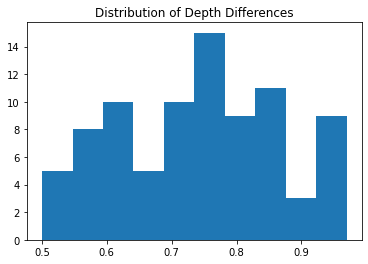

In [43]:
    
# look at distribution of depth differences in the random sequence

differences = []

for trial in sol4_discrim_trials:
    depth0 = float(trial[0][1])
    depth1 = float(trial[1][1])
    
    diff = abs(depth0-depth1)
    differences.append(diff)

    
    
plt.figure()


plt.hist(differences)
plt.title('Distribution of Depth Differences')


print(np.array(differences).mean(),np.array(differences).std())

plt.show()

In [44]:
print(len(sol4_discrim_trials))

85


In [45]:
np.array(differences).min()

0.5005

In [24]:
sol3_discrim_trials[0]

[['depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-original.jpg',
  1.138],
 ['depth_duration_stimuli/002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1/002344_2014-06-28_20-06-29_260595134347_rgbf000030-resize_1-original.jpg',
  1.5795]]

## Load Raw TAC Verbal Judgement Data

In [26]:
# TAC_raw_individual_trial_data_path  = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# TAC_raw_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# x data
with open(TAC_raw_individual_trial_data_path + 'X_250.npy' , 'rb') as f:
    TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
    TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
    TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_1000.npy' , 'rb') as f:
    TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_raw_individual_trial_data_path + 'final_y_250.npy' , 'rb') as f:
    TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
    TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
    TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_1000.npy' , 'rb') as f:
    TAC_final_y_1000= np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_250.npy', 'rb') as f:
    TAC_final_stim_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy', 'rb') as f:
    TAC_final_stim_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy', 'rb') as f:
    TAC_final_stim_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_1000.npy', 'rb') as f:
    TAC_final_stim_1000 = np.load(f, allow_pickle=True)
    
# std data
with open(TAC_raw_individual_trial_data_path + 'std_250.npy' , 'rb') as f:
    TAC_std_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_500.npy' , 'rb') as f:
    TAC_std_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'std_750.npy' , 'rb') as f:
    TAC_std_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_1000.npy' , 'rb') as f:
    TAC_std_1000 = np.load(f, allow_pickle=True)

## Load Normalized TAC Verbal Judgement Data


In [29]:
# TAC_normed_individual_trial_data_path = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

# TAC_normed_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'


TAC_normed_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'


# x data
with open(TAC_normed_individual_trial_data_path + 'n_X_250.npy' , 'rb') as f:
    n_TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_500.npy' , 'rb') as f:
    n_TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_X_750.npy' , 'rb') as f:
    n_TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_1000.npy' , 'rb') as f:
    n_TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_normed_individual_trial_data_path + 'n_final_y_250.npy' , 'rb') as f:
    n_TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_500.npy' , 'rb') as f:
    n_TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_750.npy' , 'rb') as f:
    n_TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_1000.npy' , 'rb') as f:
    n_TAC_final_y_1000= np.load(f, allow_pickle=True)

# std data
with open(TAC_normed_individual_trial_data_path + 'n_std_250.npy' , 'rb') as f:
    n_TAC_std_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_std_1000.npy' , 'rb') as f:
    n_TAC_std_1000 = np.load(f, allow_pickle=True)
    
    
# ste data
with open(TAC_normed_individual_trial_data_path + 'n_ste_250.npy' , 'rb') as f:
    n_TAC_ste_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_ste_1000.npy' , 'rb') as f:
    n_TAC_ste_1000 = np.load(f, allow_pickle=True)

In [30]:
TAC_final_stim_1000[0]

'depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-target.png'

In [32]:
sol3_discrim_trials[0][0][0][:-13]

'depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2'

In [46]:
n_VE_answerkey_1000 = {} # corresponding answer key for discrimination trials  

for combo in sol4_discrim_trials:
    depth_dur_path0 = combo[0][0][:-13] + '-target.png'
    targetimg0 = depth_dur_path0.split('/')[-1]
    idx0 = np.where(TAC_final_stim_1000 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_1000[idx0]
    std0 = n_TAC_std_1000[idx0]


    depth_dur_path1 = combo[1][0][:-13] + '-target.png'
    targetimg1 = depth_dur_path1.split('/')[-1]
    idx1= np.where(TAC_final_stim_1000 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_1000[idx1]
    std1 = n_TAC_std_1000[idx1]
    
    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_1000[targetimg0] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1,
                             'VE_depth_diff': abs(avg_estim_stim0-avg_estim_stim1)}

In [47]:
all_VE_depthdiffs = []

for key in n_VE_answerkey_1000.keys():
    VE_depthdiff = n_VE_answerkey_1000[key]['VE_depth_diff']
    all_VE_depthdiffs.append(VE_depthdiff)
    

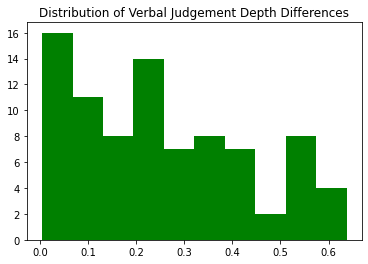

In [48]:
plt.figure()


plt.hist(all_VE_depthdiffs, color='green')
plt.title('Distribution of Verbal Judgement Depth Differences')


plt.show()